In [22]:
# Names: Hung Nguyen, Gerardo Rivera, Harry Cao
# Professor: Bingyi Xie
# Class: CSC 1302
# CRN: 14301

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading the dataset
pd.set_option('display.max_rows', None)        # This line allows jupyter to display all of the rows of the dataframe
df = pd.read_fwf("auto-mpg.data")              # Reading the dataset
df.columns = range(df.columns.size)            # Reset the column's name
df = df.rename({0: "mpg", 1: "cylinders", 2: "displacement", 3: "horsepower", 4: "weight", 5: "acceleration", 6: "model year", 7: "origin", 8: "name"}, axis = "columns")
                                # Display the dataset
display(df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,"""ford galaxie 500"""
5,14.0,8,454.0,220.0,4354.0,9.0,70,1,"""chevrolet impala"""
6,14.0,8,440.0,215.0,4312.0,8.5,70,1,"""plymouth fury iii"""
7,14.0,8,455.0,225.0,4425.0,10.0,70,1,"""pontiac catalina"""
8,15.0,8,390.0,190.0,3850.0,8.5,70,1,"""amc ambassador dpl"""
9,15.0,8,383.0,170.0,3563.0,10.0,70,1,"""dodge challenger se"""


In [23]:
# Step 1: Clean Data
# According to the auto-mpg.name file, there are 6 missing values in the horsepower columns, which we will remove the rows with those values.
df = df[df.horsepower != "?"]
# Reseting the index
df = df.reset_index(drop = True)
# Mapping the origin number to its corresponding country based on the VIN code
df = df.replace({'origin': {1: "USA", 2: "Canada", 3: "Mexico"}})
display(df)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,15.0,8,350.0,165.0,3693.0,11.5,70,USA,"""buick skylark 320"""
1,18.0,8,318.0,150.0,3436.0,11.0,70,USA,"""plymouth satellite"""
2,16.0,8,304.0,150.0,3433.0,12.0,70,USA,"""amc rebel sst"""
3,17.0,8,302.0,140.0,3449.0,10.5,70,USA,"""ford torino"""
4,15.0,8,429.0,198.0,4341.0,10.0,70,USA,"""ford galaxie 500"""
5,14.0,8,454.0,220.0,4354.0,9.0,70,USA,"""chevrolet impala"""
6,14.0,8,440.0,215.0,4312.0,8.5,70,USA,"""plymouth fury iii"""
7,14.0,8,455.0,225.0,4425.0,10.0,70,USA,"""pontiac catalina"""
8,15.0,8,390.0,190.0,3850.0,8.5,70,USA,"""amc ambassador dpl"""
9,15.0,8,383.0,170.0,3563.0,10.0,70,USA,"""dodge challenger se"""


In [205]:
# Step 3.1: Calculating the median horsepower and the average weight 
median_h = df['horsepower'].median()
mean_w = df['weight'].mean()

# print the results
print(f"Median horsepower: {median_h}")
print(f"Mean of weight: {mean_w:.3f}")

Median horsepower: 93.0
Mean of weight: 2976.238


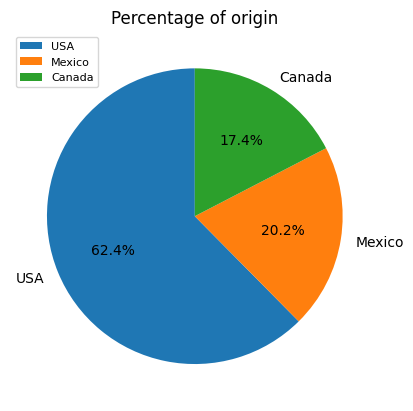

In [206]:
# Step 4: Visualize the data
# Pie chart 
US_count = (df['origin'].value_counts()['USA']) / 391 * 100
Mex_count = df['origin'].value_counts()['Mexico'] / 391 * 100
Can_count= 100 - Mex_count - US_count

sizes = [US_count, Mex_count, Can_count]
plt.title('Percentage of origin')
plt.pie(sizes, labels= ['USA', 'Mexico', 'Canada'], autopct='%1.1f%%', startangle = 90)
plt.legend(fontsize=8)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


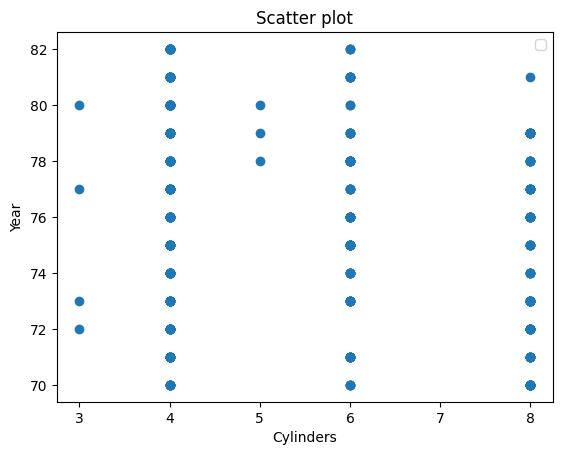

In [207]:
# Scatter chart
x = df['cylinders']
y = df['model year'] 
plt.scatter(x, y)
# Add labels and title
plt.xlabel('Cylinders')
plt.ylabel('Year')
plt.title('Scatter plot')
# Show the plot
plt.legend()
plt.show()

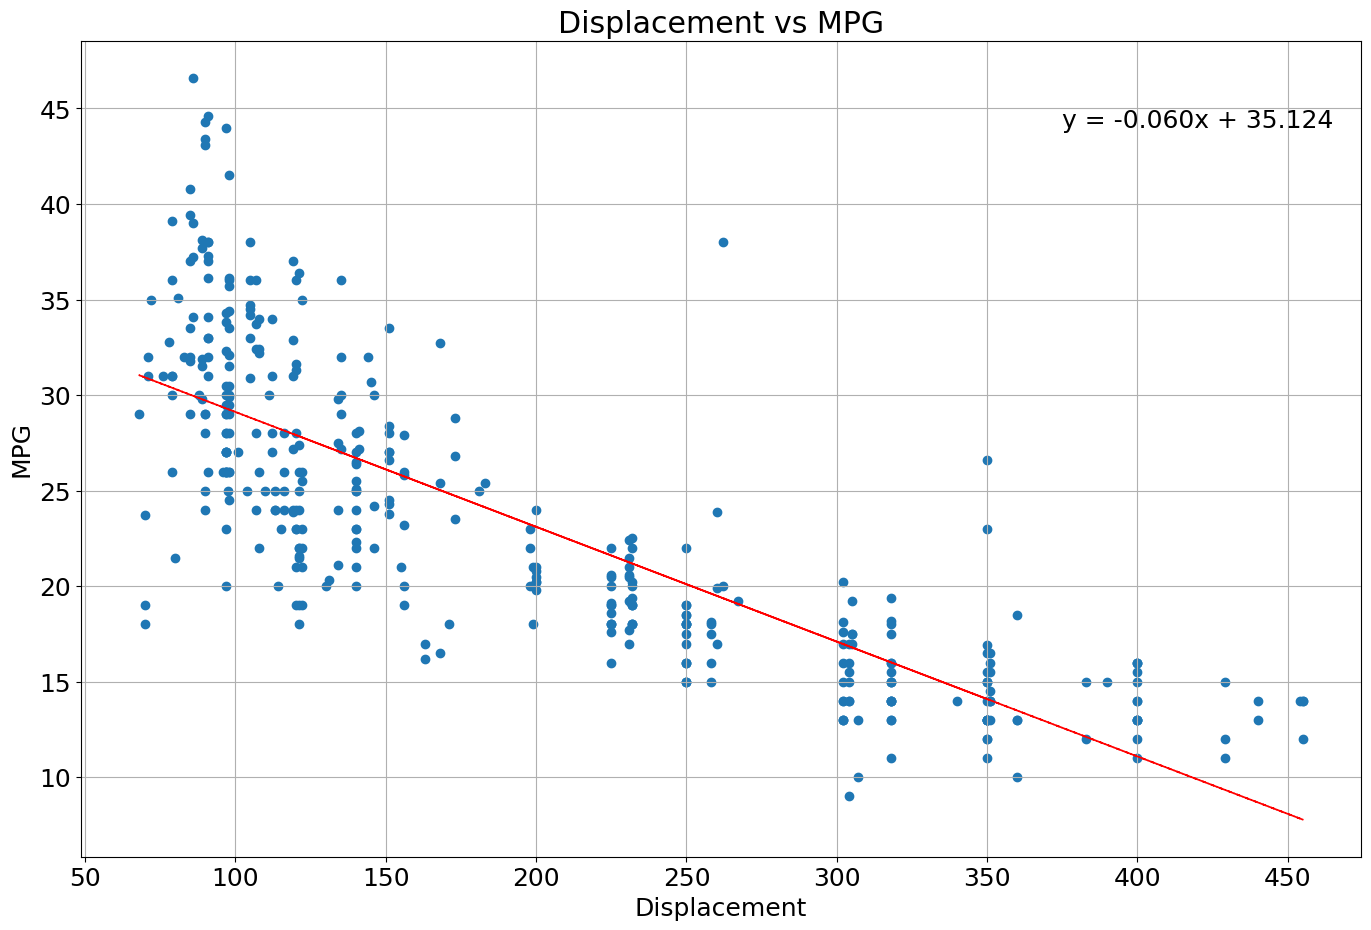

In [41]:
# Scatter chart: Displacement vs MPG
# Changing font size:
plt.rcParams['font.size'] = 18
# X and Y
x2 = df["displacement"]
y2 = df["mpg"]

# Best fit line
a, b = np.polyfit(x2,y2,1)

# creating figure
fig3 = plt.figure()
ax3 = fig3.add_axes([0,0,2,1.7])
ax3.scatter(x2, y2)       # Scatter chart
ax3.plot(x2, a * x2 + b, "r--", linewidth = 1.25)     # Best fit line
plt.text(375, 44, f"y = {a:.3f}x + {b:.3f}")
# Setting labels and titles
ax3.set_xlabel("Displacement")
ax3.set_ylabel("MPG")
ax3.set_title("Displacement vs MPG")
ax3.grid(True)

Text(0.5, 1.0, 'Number of cars with corresponding cylinders number')

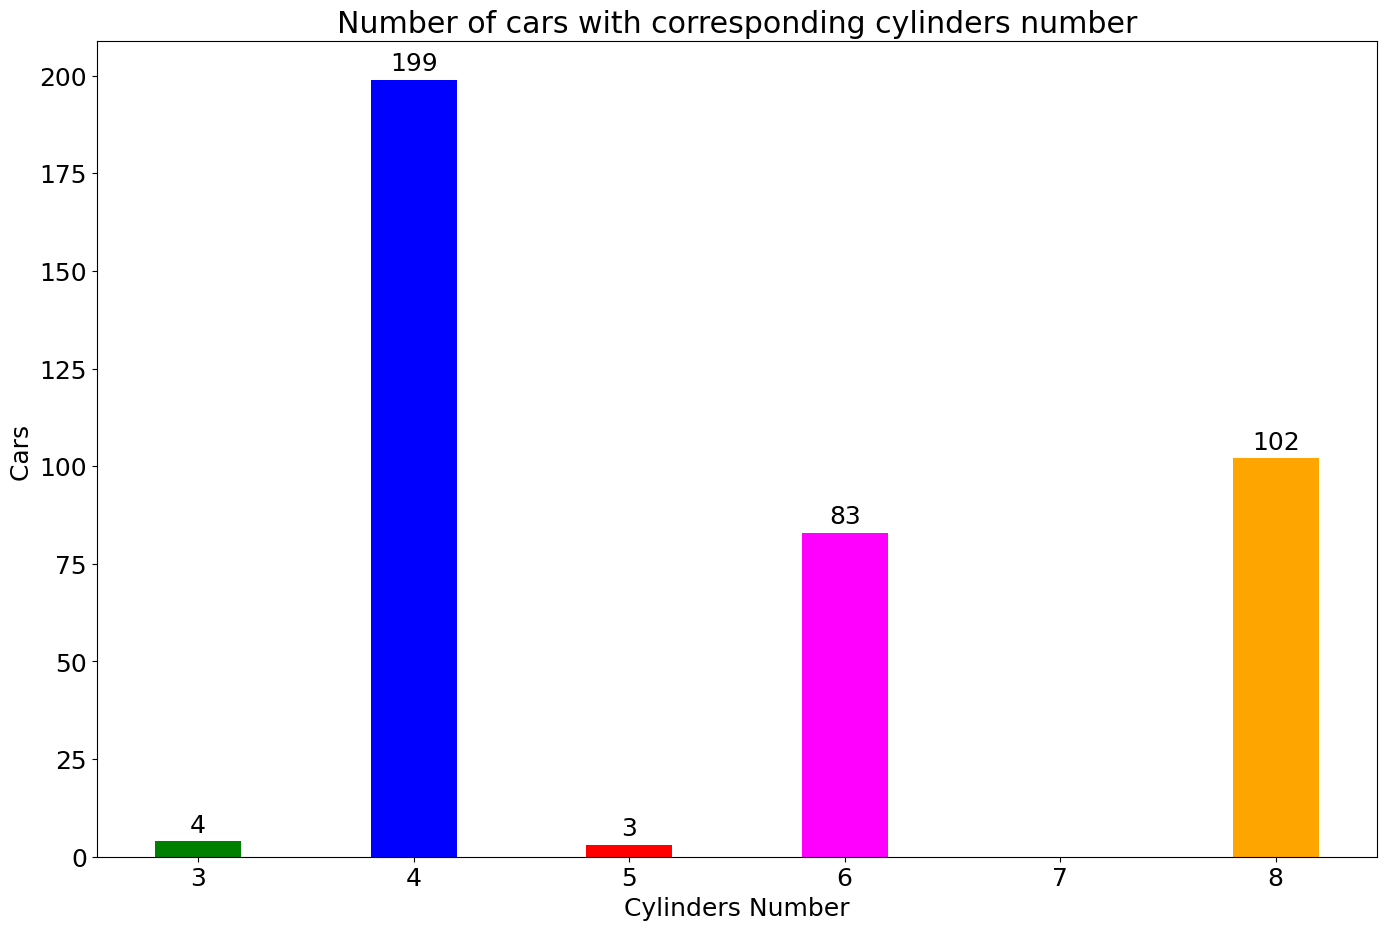

In [42]:
# Bar chart: Numbers of cars that has the correspondent numbers of cylinders
# Keys and Values
keys = df["cylinders"].values.tolist()
keys = [*set(keys)]
values = [
    df['cylinders'].value_counts()[3],
    df['cylinders'].value_counts()[4],
    df['cylinders'].value_counts()[5],
    df['cylinders'].value_counts()[6],
    df['cylinders'].value_counts()[8]
]
# Plotting
fig4 = plt.figure()
ax4 = fig4.add_axes([0,0,2,1.7])
plot4 = ax4.bar(keys, values, width = 0.4, color = ["green", "blue", "red", "magenta", "orange"])
# Adding numbers on top of each bar
for bar in plot4:
   height = bar.get_height()
   ax4.annotate('{}'.format(height),
      xy=(bar.get_x() + bar.get_width() / 2, height),
      xytext=(0, 3), 
      textcoords="offset points",
      ha='center', va='bottom')
# Labels and titles
ax4.set_xlabel("Cylinders Number")
ax4.set_ylabel("Cars ")
ax4.set_title("Number of cars with corresponding cylinders number")

In [44]:
# Bonus: Build a regression model
# Unmapping the countries
df = pd.read_fwf("auto-mpg.data")              # Reading the dataset
df.columns = range(df.columns.size)            # Reset the column's name
df = df.rename({0: "mpg", 1: "cylinders", 2: "displacement", 3: "horsepower", 4: "weight", 5: "acceleration", 6: "model year", 7: "origin", 8: "name"}, axis = "columns")
df = df[df.horsepower != "?"]
# Reseting the index
df = df.reset_index(drop = True)
from sklearn.model_selection import train_test_split
# End of unmapping step
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# split the dataset into training and validation sets
X = df.drop(["mpg", "name"], axis=1)
y = df["mpg"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# build a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

# evaluate the model using MSE
y_pred = lr.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(f'MSE: {mse:.4f}')





MSE: 11.3208
